# GaussPy+ tutorial for introducing helper functions

This notebook is intended to guide users through helper functions included in GaussPy+ that are useful for manipulating FITS cubes and verify the decomposition results. 

For this tutorial we will use the Orion (DHT27) $^12$CO data set described in [Wilson, Dame, Masheder, & Thaddeus (2005), A&A, 430, 523](http://adsabs.harvard.edu/abs/2005A%26A...430..523W) and downloaded from [here](https://www.cfa.harvard.edu/rtdc/CO/NumberedRegions/DHT27/index.html). 

We will use the interpolated v-l-b FITS cube, which we will download in the next cell.

In [128]:
%matplotlib inline

import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from pprint import pprint

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec
cmap = cm.get_cmap('magma_r')
cmap.set_under('ivory')

url = 'https://www.cfa.harvard.edu/rtdc/CO/NumberedRegions/DHT27/DHT27_Orion_interp.fits'

hdu = fits.open(url)[0]
data = hdu.data
header = hdu.header
header

SIMPLE  =                    T  / Standard FITS format                          
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    3  / Number of axes                                
NAXIS1  =                   77  / Number pixels on axis 1                       
NAXIS2  =                  209  / Number pixels on axis 2                       
NAXIS3  =                  153  / Number pixels on axis 3                       
CTYPE1  = 'VELO-LSR'            / axis 1 coord type                             
CRVAL1  =        -9.427200E+00  / coord value at CRPIX1                         
CDELT1  =         6.501900E-01  / linear pixel spacing axis 1                   
CRPIX1  =             1.000000  / ref pixel for axis 1                          
CTYPE2  = 'GLON-CAR'            / axis 2 coord type                             
CRVAL2  =         2.260000E+02  / coord value at CRPIX2                         
CDELT2  =        -1.250000E-

## Swapping the axes of the FITS cube and correcting for missing CUNIT keys

The axes of the downloaded FITS cube are stored in the sequence v-l-b, whereas ``GaussPy+`` expects the axes to be in the l-b-v sequence.

In the following, we will use the ``swap_axis`` function to correct the axis sequence.

In addition, the FITS cube is missing ``CUNIT*`` keywords for all of the axes. By default, ``GaussPy+`` assumes in such a case that the spatial axes have units of ``deg`` and the unit of the spectral axis is ``m/s``. However, the spectral axis of the FITS cube of Orion is given in ``km/s``, which is why we will directly modify the FITS header accordingly.

In [129]:
from gausspyplus.utils.spectral_cube_functions import swap_axes

data, header = swap_axes(data, header, (1, 2, 0))
header['CUNIT1'] = 'deg'
header['CUNIT2'] = 'deg'
header['CUNIT3'] = 'km/s'
hdu_orig = fits.PrimaryHDU(data=data, header=header)
header

SIMPLE  =                    T  / Standard FITS format                          
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    3  / Number of axes                                
NAXIS1  =                  209 / Number pixels on axis 1                        
NAXIS2  =                  153 / Number pixels on axis 2                        
NAXIS3  =                   77 / Number pixels on axis 3                        
CTYPE1  = 'GLON-CAR'           / axis 1 coord type                              
CRVAL1  =                226.0 / coord value at CRPIX1                          
CDELT1  =               -0.125 / linear pixel spacing axis 1                    
CRPIX1  =             1.000000  / ref pixel for axis 1                          
CTYPE2  = 'GLAT-CAR'           / axis 2 coord type                              
CRVAL2  =                  0.0 / coord value at CRPIX2                          
CDELT2  =                0.1

## Plot zeroth moment and position-velocity maps of the data set


create a moment0 fits file from the cube



create a PV fits file from the cube


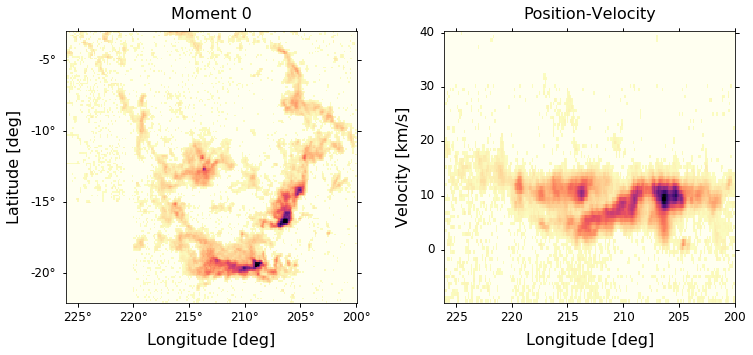

In [130]:
from gausspyplus.utils.spectral_cube_functions import pv_map, moment_map

def add_features(ax, xlabel=None, ylabel=None, title=None, pad=None):
    ax.tick_params(pad=6, size=8, labelsize=12, which='both')
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
        
    if xlabel is not None:
        ax.set_xlabel(xlabel, size=16)
    if ylabel is not None:
        ax.set_ylabel(ylabel, size=16)
    if title is not None:
        ax.set_title(title, pad=12, size=16)


hdu = hdu_orig.copy()

fig = plt.figure(figsize=(12, 5))
plt.subplots_adjust(wspace=0.3)

hdu_pp = moment_map(hdu=hdu)
hdr = hdu_pp.header
ax = plt.subplot(121, projection=WCS(hdr))
ax.imshow(hdu_pp.data, aspect='auto', cmap=cmap, vmin=1.25, vmax=100)
add_features(ax, xlabel='Longitude [deg]', ylabel='Latitude [deg]', title='Moment 0', pad=-3)

hdu_pv = pv_map(hdu=hdu)
ax = plt.subplot(122, projection=WCS(hdu_pv.header))
ax.imshow(hdu_pv.data, aspect='auto', cmap=cmap, vmin=2.5, vmax=250)
add_features(ax, xlabel='Longitude [deg]', ylabel='Velocity [km/s]', title='Position-Velocity', pad=-3)

plt.show()

## Make a subcube

With the following commands, we can extract a subcube of the (axes-corrected) original data cube that includes only Orion A.

In [139]:
from gausspyplus.utils.spectral_cube_functions import make_subcube, get_spectral_axis

hdu = hdu_orig.copy()
slice_params = (slice(5, 45), slice(5, 40), slice(65, 173))
data, header = make_subcube(slice_params, hdu=hdu)
hdu = fits.PrimaryHDU(data=data, header=header)


making subcube with the slice parameters (slice(5, 45, None), slice(5, 40, None), slice(65, 173, None))...



create a moment0 fits file from the cube

create a PV fits file from the cube


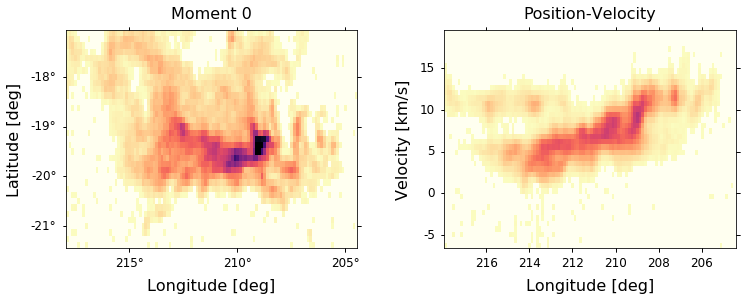

In [141]:
fig = plt.figure(figsize=(12, 4))
plt.subplots_adjust(wspace=0.3)

hdu_pp = moment_map(hdu=hdu)
hdr = hdu_pp.header
ax = plt.subplot(121, projection=WCS(hdr))
ax.imshow(hdu_pp.data, aspect='auto', cmap=cmap, vmin=1.25, vmax=100)
add_features(ax, xlabel='Longitude [deg]', ylabel='Latitude [deg]', title='Moment 0', pad=-3)

hdu_pv = pv_map(hdu=hdu)
ax = plt.subplot(122, projection=WCS(hdu_pv.header))
ax.imshow(hdu_pv.data, aspect='auto', cmap=cmap, vmin=2.5, vmax=250)
add_features(ax, xlabel='Longitude [deg]', ylabel='Velocity [km/s]', title='Position-Velocity', pad=-3)

plt.show()